In [3]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
from matplotlib import pylab

import yt
import numpy as np
from yt import derived_field

In [1]:
filename =  "/global/project/projectdirs/m3018/Emu/3d_test2/plt00214"

In [21]:
filename3flavor = "/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt00300"

# Defining Fields (N, Fx, Fy) for 3 Flavor Simulation (note the 3-flavor neutrino number density field definitions are the most up-to-date)

In [33]:
#3 flavor neutrino derived fields: Number Density
#normalize by the trace
@derived_field(name="Norm", units="dimensionless", sampling_type="cell",force_override=True)
def _Norm(field, data):
    return np.abs(data["N00_Re"]) + np.abs(data["N11_Re"]) + np.abs(data["N22_Re"])
@derived_field(name="N01_Norm", units="dimensionless", sampling_type="cell",force_override=True)
def _N01_Norm(field, data):
    return np.abs(data["N00_Re"]) + np.abs(data["N11_Re"])
@derived_field(name="N02_Norm", units="dimensionless", sampling_type="cell",force_override=True)
def _N02_Norm(field, data):
    return np.abs(data["N00_Re"]) + np.abs(data["N22_Re"])
@derived_field(name="N12_Norm", units="dimensionless", sampling_type="cell",force_override=True)
def _N12_Norm(field, data):
    return np.abs(data["N11_Re"]) + np.abs(data["N22_Re"])

#individual flavor pairing magnitudes, 0=electron, 1=mu, 2=tau
@derived_field(name="N01_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _N01_Mag(field, data):
    return np.sqrt((data["N01_Im"]/data["N01_Norm"])**2 + (data["N01_Re"]/data["N01_Norm"])**2)
@derived_field(name="N02_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _N02_Mag(field, data):
    return np.sqrt((data["N02_Im"]/data["N02_Norm"])**2 + (data["N02_Re"]/data["N02_Norm"])**2)
@derived_field(name="N12_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _N12_Mag(field, data):
    return np.sqrt((data["N12_Im"]/data["N12_Norm"])**2 + (data["N12_Re"]/data["N12_Norm"])**2)

#Diagonal components normalized
@derived_field(name="N00_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _N00_Mag(field, data):
    return data["N00_Re"]/data["Norm"]
@derived_field(name="N11_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _N11_Mag(field, data):
    return data["N11_Re"]/data["Norm"]
@derived_field(name="N22_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _N22_Mag(field, data):
    return data["N22_Re"]/data["Norm"]

#total off-diagonal magnitude
@derived_field(name="OffDiag_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Diag_Mag(field, data):
    return np.sqrt((data["N01_Im"]/data["Norm"])**2 + (data["N01_Re"]/data["Norm"])**2 + (data["N02_Im"]/data["Norm"])**2 + (data["N02_Re"]/data["Norm"])**2 + (data["N12_Im"]/data["Norm"])**2 + (data["N12_Re"]/data["Norm"])**2)

#off-diagonal phases in degrees for each off-diagonal component is the arctan(Im/Re)
@derived_field(name="N01_Phase", units="dimensionless", sampling_type="cell",force_override=True)
def _N01_Phase(field, data):
    return np.arctan2(data["N01_Im"],data["N01_Re"])*(180/np.pi)
@derived_field(name="N02_Phase", units="dimensionless", sampling_type="cell",force_override=True)
def _N02_Phase(field, data):
    return np.arctan2(data["N02_Im"],data["N02_Re"])*(180/np.pi)
@derived_field(name="N12_Phase", units="dimensionless", sampling_type="cell",force_override=True)
def _N12_Phase(field, data):
    return np.arctan2(data["N12_Im"],data["N12_Re"])*(180/np.pi)
#---------------------------------------------------------------------------------------------    
#3 flavor derived fields: Fx
@derived_field(name="Fx_Norm", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx_Norm(field, data):
    return np.abs(data["Fx00_Re"]) + np.abs(data["Fx11_Re"]) + np.abs(data["Fx22_Re"])

#individual flavor pairing magnitudes, 0=electron, 1=mu, 2=tau
@derived_field(name="Fx01_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx01_Mag(field, data):
    return np.sqrt((data["Fx01_Im"]/data["Fx_Norm"])**2 + (data["Fx01_Re"]/data["Fx_Norm"])**2)
@derived_field(name="Fx02_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx02_Mag(field, data):
    return np.sqrt((data["Fx02_Im"]/data["Fx_Norm"])**2 + (data["Fx02_Re"]/data["Fx_Norm"])**2)
@derived_field(name="Fx12_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx12_Mag(field, data):
    return np.sqrt((data["Fx12_Im"]/data["Fx_Norm"])**2 + (data["Fx12_Re"]/data["Fx_Norm"])**2)

#total off-diagonal magnitude
@derived_field(name="FxOffDiag_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _FxDiag_Mag(field, data):
    return np.sqrt((data["Fx01_Im"]/data["Fx_Norm"])**2 + (data["Fx01_Re"]/data["Fx_Norm"])**2 + (data["Fx02_Im"]/data["Fx_Norm"])**2 + (data["Fx02_Re"]/data["Fx_Norm"])**2 + (data["Fx12_Im"]/data["Fx_Norm"])**2 + (data["Fx12_Re"]/data["Fx_Norm"])**2)

#---------------------------------------------------------------------------------------------    
#3 flavor derived fields: Fz
@derived_field(name="Fz_Norm", units="dimensionless", sampling_type="cell",force_override=True)
def _Fz_Norm(field, data):
    return np.abs(data["Fz00_Re"]) + np.abs(data["Fz11_Re"]) + np.abs(data["Fz22_Re"])

#individual flavor pairing magnitudes, 0=electron, 1=mu, 2=tau
@derived_field(name="Fz01_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Fz01_Mag(field, data):
    return np.sqrt((data["Fz01_Im"]/data["Fz_Norm"])**2 + (data["Fz01_Re"]/data["Fz_Norm"])**2)
@derived_field(name="Fz02_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Fz02_Mag(field, data):
    return np.sqrt((data["Fz02_Im"]/data["Fz_Norm"])**2 + (data["Fz02_Re"]/data["Fz_Norm"])**2)
@derived_field(name="Fz12_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _Fz12_Mag(field, data):
    return np.sqrt((data["Fz12_Im"]/data["Fz_Norm"])**2 + (data["Fz12_Re"]/data["Fz_Norm"])**2)

#total off-diagonal magnitude
@derived_field(name="FzOffDiag_Mag", units="dimensionless", sampling_type="cell",force_override=True)
def _FzDiag_Mag(field, data):
    return np.sqrt((data["Fz01_Im"]/data["Fz_Norm"])**2 + (data["Fz01_Re"]/data["Fz_Norm"])**2 + (data["Fz02_Im"]/data["Fz_Norm"])**2 + (data["Fz02_Re"]/data["Fz_Norm"])**2 + (data["Fz12_Im"]/data["Fz_Norm"])**2 + (data["Fz12_Re"]/data["Fz_Norm"])**2)
#---------------------------------------------------------------------------------------------    
#3 flavor derived fields: Fy

In [7]:
#3 flavor antineutrino derived fields
#normalize by the trace
@derived_field(name="Normbar", units="dimensionless", sampling_type="cell",force_override=True)
def _Normbar(field, data):
    return np.abs(data["N00_Rebar"]) + np.abs(data["N11_Rebar"]) + np.abs(data["N22_Rebar"])

#individual flavor pairing magnitudes, 0=electron, 1=mu, 2=tau
@derived_field(name="N01_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _N01_Magbar(field, data):
    return np.sqrt((data["N01_Imbar"]/data["Normbar"])**2 + (data["N01_Rebar"]/data["Normbar"])**2)
@derived_field(name="N02_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _N02_Magbar(field, data):
    return np.sqrt((data["N02_Imbar"]/data["Normbar"])**2 + (data["N02_Rebar"]/data["Normbar"])**2)
@derived_field(name="N12_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _N12_Magbar(field, data):
    return np.sqrt((data["N12_Imbar"]/data["Normbar"])**2 + (data["N12_Rebar"]/data["Normbar"])**2)

#---------------------------------------------------------------------------------------------    
#3 flavor derived fields: Fx
@derived_field(name="Fx_Normbar", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx_Normbar(field, data):
    return np.abs(data["Fx00_Rebar"]) + np.abs(data["Fx11_Rebar"]) + np.abs(data["Fx22_Rebar"])

#individual flavor pairing magnitudes, 0=electron, 1=mu, 2=tau
@derived_field(name="Fx01_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx01_Magbar(field, data):
    return np.sqrt((data["Fx01_Imbar"]/data["Fx_Normbar"])**2 + (data["Fx01_Rebar"]/data["Fx_Normbar"])**2)
@derived_field(name="Fx02_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx02_Magbar(field, data):
    return np.sqrt((data["Fx02_Imbar"]/data["Fx_Normbar"])**2 + (data["Fx02_Rebar"]/data["Fx_Normbar"])**2)
@derived_field(name="Fx12_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _Fx12_Magbar(field, data):
    return np.sqrt((data["Fx12_Imbar"]/data["Fx_Normbar"])**2 + (data["Fx12_Rebar"]/data["Fx_Normbar"])**2)

#total off-diagonal magnitude
@derived_field(name="FxOffDiag_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _FxDiag_Magbar(field, data):
    return np.sqrt((data["Fx01_Imbar"]/data["Fx_Normbar"])**2 + (data["Fx01_Rebar"]/data["Fx_Normbar"])**2 + (data["Fx02_Imbar"]/data["Fx_Normbar"])**2 + (data["Fx02_Rebar"]/data["Fx_Normbar"])**2 + (data["Fx12_Imbar"]/data["Fx_Normbar"])**2 + (data["Fx12_Rebar"]/data["Fx_Normbar"])**2)
         
#---------------------------------------------------------------------------------------------    
#total off-diagonal magnitude
@derived_field(name="OffDiag_Magbar", units="dimensionless", sampling_type="cell",force_override=True)
def _Diag_Mag(field, data):
    return np.sqrt((data["N01_Imbar"]/data["Normbar"])**2 + (data["N01_Rebar"]/data["Normbar"])**2 + (data["N02_Imbar"]/data["Normbar"])**2 + (data["N02_Rebar"]/data["Normbar"])**2 + (data["N12_Imbar"]/data["Normbar"])**2 + (data["N12_Rebar"]/data["Normbar"])**2)
                     

# Creating an 3d fft function that can be applied to a specified field and data file

In [8]:
#FFT function takes a data file name (defined as a variable or in string format), and a field in string format
def FFT(data,field):
    ds = yt.load(data)
    cg = ds.covering_grid(level=0, left_edge=ds.domain_left_edge,
                      dims=ds.domain_dimensions)
    # get a 2D numpy array containing the slice data at the first cell-center index in x
    Meu = cg[field][:,:,:].d

    # number of cells in each dimension. Tot is 1x50x50 = 2500
    Nx = ds.domain_dimensions[0]
    Ny = ds.domain_dimensions[1]
    Nz = ds.domain_dimensions[2]

    # find dx, dy, dz in each of X,Y,Z
    # this is the spacing between cell centers in the domain
    # it is the same as the spacing between cell edges
    dx = (ds.domain_right_edge[0] - ds.domain_left_edge[0])/ds.domain_dimensions[0]
    dy = (ds.domain_right_edge[1] - ds.domain_left_edge[1])/ds.domain_dimensions[1]
    dz = (ds.domain_right_edge[2] - ds.domain_left_edge[2])/ds.domain_dimensions[2]

    # low, high edge locations in x domain
    xlo = ds.domain_left_edge[0]
    xhi = ds.domain_right_edge[0]

    # the offset between the edges xlo, xhi and the interior cell centers
    x_cc_offset = 0.5 * dx

    X, DX = np.linspace(xlo + x_cc_offset, # first cell centered location in the interior of x domain
                        xhi - x_cc_offset, # last cell centered location in the interior of x domain
                        num=Nx,            # Nx evenly spaced samples
                        endpoint=True,     # include interval endpoint for the last cell-centered location in the domain
                        retstep=True)      # return the stepsize between cell centers to check consistency with dx

    # low, high edge locations in y domain
    ylo = ds.domain_left_edge[1]
    yhi = ds.domain_right_edge[1]

    # the offset between the edges ylo, yhi and the interior cell centers
    y_cc_offset = 0.5 * dy

    Y, DY = np.linspace(ylo + y_cc_offset, # first cell centered location in the interior of y domain
                        yhi - y_cc_offset, # last cell centered location in the interior of y domain
                        num=Ny,            # Ny evenly spaced samples
                        endpoint=True,     # include interval endpoint for the last cell-centered location in the domain
                        retstep=True)      # return the stepsize between cell centers to check consistency with dy

    # low, high edge locations in z domain
    zlo = ds.domain_left_edge[2]
    zhi = ds.domain_right_edge[2]

    # the offset between the edges zlo, zhi and the interior cell centers
    z_cc_offset = 0.5 * dz

    Z, DZ = np.linspace(zlo + z_cc_offset, # first cell centered location in the interior of z domain
                        zhi - z_cc_offset, # last cell centered location in the interior of z domain
                        num=Nz,            # Nz evenly spaced samples
                        endpoint=True,     # include interval endpoint for the last cell-centered location in the domain
                        retstep=True)      # return the stepsize between cell centers to check consistency with dz

    # the spacing we calculated should be the same as what linspace finds between cell centers
    # using our edge-to-cell-center offset and the number of samples
    print("dx, DX = ", dx, DX)
    print("dy, DY = ", dy, DY)
    print("dz, DZ = ", dz, DZ)

    # generate a mesh of samples Y, Z
    X, Y, Z = np.meshgrid(X, Y, Z)

    # try zero-centering the values Meu to subtract off any constant shift in the domain
    ave_meu = np.average(Meu)
    dMeu_a = Meu - ave_meu
    dMeu = Meu

    # get the absolute value of the fft of Z
    # use fftn to do an N-dimensional FFT on an N-dimensional numpy array
    dMeu_k_a = np.abs(fft.fftn(dMeu_a))
    dMeu_k = np.abs(fft.fftn(dMeu))

    # we're shifting the sampling frequencies next, so we have to shift the FFT values
    dMeu_k_a = fft.fftshift(dMeu_k_a)
    dMeu_k = fft.fftshift(dMeu_k)

    # find the sampling frequencies in X,Y,Z & shift them
    kx = fft.fftfreq(Nx, dx)
    kx = fft.fftshift(kx)

    ky = fft.fftfreq(Ny, dy)
    ky = fft.fftshift(ky)

    kz = fft.fftfreq(Nz, dz)
    kz = fft.fftshift(kz)

    # generate a grid of points in K-space for making a 3D plot
    Ky, Kx, Kz = np.meshgrid(ky, kx, kz)
    
    #indices: 0 = kx, 1 = ky, 2 = kz, 3 = dMeu_k, 4 = dMeu_k_a
    return [kx, ky, kz, dMeu_k, dMeu_k_a, ds]

# Looping through fields of interest, running fft for each field, then generating fft plots

yt : [INFO     ] 2020-11-03 11:33:06,546 Parameters: current_time              = 3.608627740975839e-10
yt : [INFO     ] 2020-11-03 11:33:06,547 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-11-03 11:33:06,548 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-03 11:33:06,549 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.078125 code_length 0.078125 code_length
dy, DY =  0.078125 code_length 0.078125 code_length
dz, DZ =  0.078125 code_length 0.078125 code_length


yt : [INFO     ] 2020-11-03 11:33:14,122 Parameters: current_time              = 3.608627740975839e-10
yt : [INFO     ] 2020-11-03 11:33:14,125 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-11-03 11:33:14,126 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-03 11:33:14,128 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.078125 code_length 0.078125 code_length
dy, DY =  0.078125 code_length 0.078125 code_length
dz, DZ =  0.078125 code_length 0.078125 code_length


yt : [INFO     ] 2020-11-03 11:33:18,256 Parameters: current_time              = 3.608627740975839e-10
yt : [INFO     ] 2020-11-03 11:33:18,257 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-11-03 11:33:18,259 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-03 11:33:18,259 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.078125 code_length 0.078125 code_length
dy, DY =  0.078125 code_length 0.078125 code_length
dz, DZ =  0.078125 code_length 0.078125 code_length


yt : [INFO     ] 2020-11-03 11:33:22,278 Parameters: current_time              = 3.608627740975839e-10
yt : [INFO     ] 2020-11-03 11:33:22,279 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-11-03 11:33:22,280 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-03 11:33:22,281 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.078125 code_length 0.078125 code_length
dy, DY =  0.078125 code_length 0.078125 code_length
dz, DZ =  0.078125 code_length 0.078125 code_length


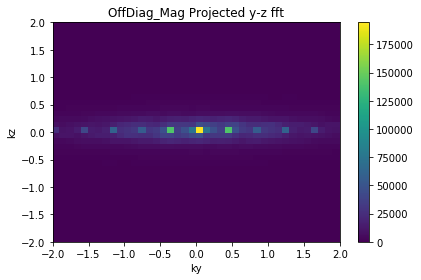

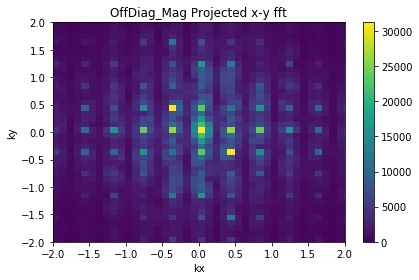

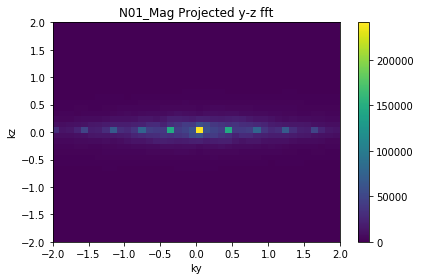

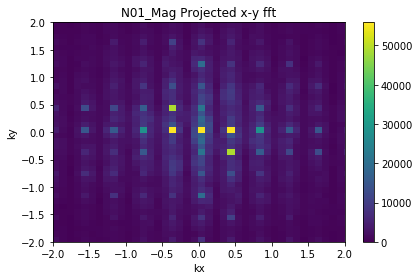

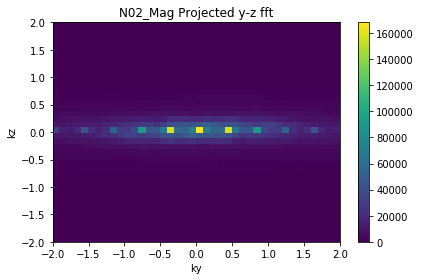

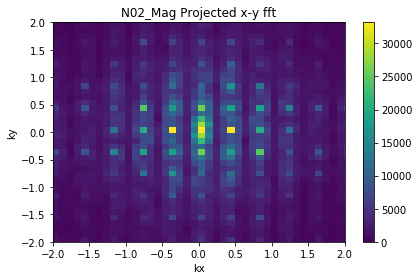

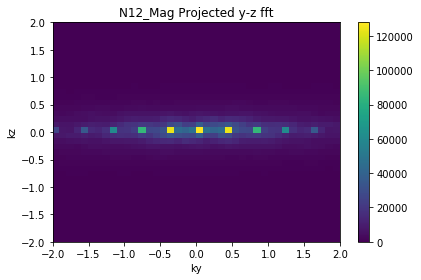

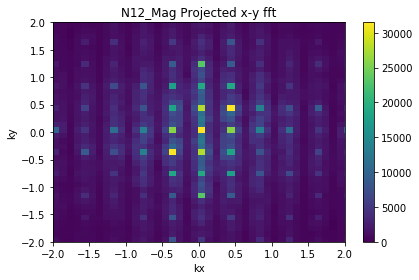

In [11]:
fields = ['OffDiag_Mag','N01_Mag','N02_Mag','N12_Mag']
anti_fields = ['OffDiag_Magbar','N01_Magbar','N02_Magbar','N12_Magbar']

for field in fields:
    #make sure to specify which filename
    f = FFT(filename3flavor,field)
    
    # Plot the Fourier surface.
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    #surf = ax.plot_surface(Ky, Kz, dMeu_k, cmap=cm.coolwarm,linewidth=0, antialiased=True)
    #ax.set_xlabel("ky")
    #ax.set_ylabel("kz")
    #ax.set_zlabel("Meu_k")

    #plt.tight_layout()

#regular fft slice plots
    #fig, ax = plt.subplots()
    #ax.pcolor(f[1], f[2], f[3][50,:,:].T, vmin=0.,vmax=np.max(f[4]))
    #ax.set_xlabel("ky")
    #ax.set_ylabel("kz")
    #plt.title(str(field) + " y-z fft")
    #plt.tight_layout()

    #fig, ax = plt.subplots()
    #ax.pcolor(f[0], f[1], f[3][:,:,50].T, vmin=0.,vmax=np.max(f[4]))
    #ax.set_xlabel("kx")
    #ax.set_ylabel("ky")
    #plt.title(str(field) + " x-y fft")
    #plt.tight_layout()

#fft projected slice plots
    dMeu_k_projected = np.sum(f[3], axis=0)
    dMeu_k_a_projected = np.sum(f[4], axis=0)
    fig, ax = plt.subplots()
    #take the transpose so the axes aren't flipped
    c = ax.pcolor(f[1], f[2], dMeu_k_projected.T, vmin=0.,vmax=np.max(dMeu_k_a_projected))
    ax.set_xlabel("ky")
    ax.set_ylabel("kz")
    ax.set_xlim((-2,2))
    ax.set_ylim((-2,2))
    fig.colorbar(c, ax=ax)
    plt.title(str(field) + " Projected y-z fft")
    plt.tight_layout()
    plt.savefig("/global/homes/n/nmford20/3D_new/{0}_{1}_kykz.png".format(f[5], field))

    dMeu_k_projected = np.sum(f[3], axis=2)
    dMeu_k_a_projected = np.sum(f[4], axis=2)
    fig, ax = plt.subplots()
    #take the transpose so the axes aren't flipped
    c = ax.pcolor(f[0], f[1], dMeu_k_projected.T, vmin=0.,vmax=np.max(dMeu_k_a_projected))
    ax.set_xlabel("kx")
    ax.set_ylabel("ky")
    ax.set_xlim((-2,2))
    ax.set_ylim((-2,2))
    fig.colorbar(c, ax=ax)
    plt.title(str(field) + " Projected x-y fft")
    plt.tight_layout()
    plt.savefig("/global/homes/n/nmford20/3D_new/{0}_{1}_kxky.png".format(f[5], field))
    

# Measuring the growth rate (need to update to more rigorously select the end of the growth phase)

In [ ]:
#yt.funcs.mylog.setLevel(100)
ds0 = yt.load(filename0)
Ts = []
omega_maxs = []

ts = sorted(glob.glob('Old Emu/Emu_3d_v3/plt00???'))
for i,ds in enumerate(ts,0): 
    print(ts[i])
    if ts[i] == 'Old Emu/Emu_3d_v3/plt00000':
        print("first plotfile")
    ds0 = yt.load(ts[i])
    dsf = yt.load(ts[i+1])
    #starting time
    T0 = ds0.current_time.in_units("s")
    #growth phase ending time: 2.9729489769706266e-10, around plt00224
    Tf = dsf.current_time.in_units("s")
    Delta_t = Tf - T0

    #Running the fft at the beginning and end of the growth phase
    f0 = FFT(ts[i],"OffDiag_Mag")
    ff = FFT(ts[i+1],"OffDiag_Mag")

    #extracting the array of amplitudes for each k (in log space) at the beginning and end of the growth phase
    y0 = np.log(f0[3])
    yf = np.log(ff[3])
    omega = (yf - y0)/Delta_t
    if ts[i] == 'Old Emu/Emu_3d_v3/plt00225':
        print("end of growth phase")
        break
    Ts.append(T0)
    omega_maxs.append(np.max(omega))

# Tracking one k mode amplitude over time

In [3]:
import glob 

Amps = []
Ts = []
ts = sorted(glob.glob('/global/project/projectdirs/m3018/Emu/3D_3flavor_5ns/plt?????'))
for i,ds in enumerate(ts,0): 
    ds = yt.load(ts[i])
    #starting time: 0
    T = ds.current_time.in_units("s")
    #Running the fft at the beginning and end of the growth phase
    f = FFT(ts[i],"OffDiag_Mag")
    #Checking amplitude in one of the growth regions
    Amps.append(f[3][64][64][64])
    Ts.append(T)
    if ts[i] == '/global/project/projectdirs/m3018/Emu/3D_3flavor_5ns/plt00550':
        print("end of growth phase")
        break

yt : [INFO     ] 2020-11-03 11:24:14,737 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-11-03 11:24:14,738 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-11-03 11:24:14,739 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-03 11:24:14,739 Parameters: domain_right_edge         = [10. 10. 10.]


NameError: name 'FFT' is not defined

In [2]:
pylab.semilogy(Ts, Amps, '-xr')
#pylab.ylabel("Density ($g/cm^3$)")
pylab.xlabel("Time (s)")
pylab.ylabel("Amplitude of (kx=0., ky=0., kz=0.) mode")
pylab.title("FFT Amplitude Over Time (Off-Diag Mag)")
pylab.legend()
#pylab.ylim(1e-32, 1e-21)
pylab.show()

NameError: name 'Ts' is not defined

# Performing same 3d fft for the flux vector Fx components

yt : [INFO     ] 2020-09-24 14:11:35,036 Parameters: current_time              = 4.424031215730022e-11
yt : [INFO     ] 2020-09-24 14:11:35,037 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2020-09-24 14:11:35,038 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-09-24 14:11:35,038 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.1 code_length 0.09999999999999999 code_length
dy, DY =  0.1 code_length 0.09999999999999999 code_length
dz, DZ =  0.1 code_length 0.09999999999999999 code_length


yt : [INFO     ] 2020-09-24 14:11:36,678 Parameters: current_time              = 4.424031215730022e-11
yt : [INFO     ] 2020-09-24 14:11:36,679 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2020-09-24 14:11:36,680 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-09-24 14:11:36,680 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.1 code_length 0.09999999999999999 code_length
dy, DY =  0.1 code_length 0.09999999999999999 code_length
dz, DZ =  0.1 code_length 0.09999999999999999 code_length


yt : [INFO     ] 2020-09-24 14:11:37,922 Parameters: current_time              = 4.424031215730022e-11
yt : [INFO     ] 2020-09-24 14:11:37,923 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2020-09-24 14:11:37,924 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-09-24 14:11:37,925 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.1 code_length 0.09999999999999999 code_length
dy, DY =  0.1 code_length 0.09999999999999999 code_length
dz, DZ =  0.1 code_length 0.09999999999999999 code_length


yt : [INFO     ] 2020-09-24 14:11:39,229 Parameters: current_time              = 4.424031215730022e-11
yt : [INFO     ] 2020-09-24 14:11:39,230 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2020-09-24 14:11:39,230 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-09-24 14:11:39,231 Parameters: domain_right_edge         = [10. 10. 10.]


dx, DX =  0.1 code_length 0.09999999999999999 code_length
dy, DY =  0.1 code_length 0.09999999999999999 code_length
dz, DZ =  0.1 code_length 0.09999999999999999 code_length


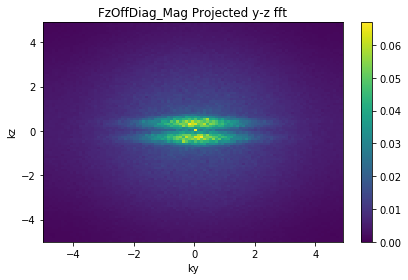

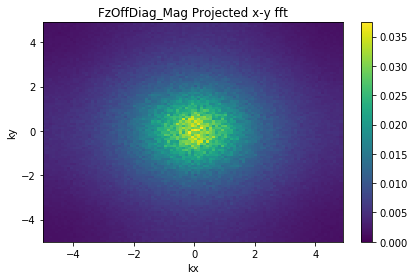

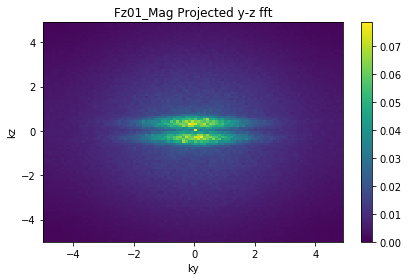

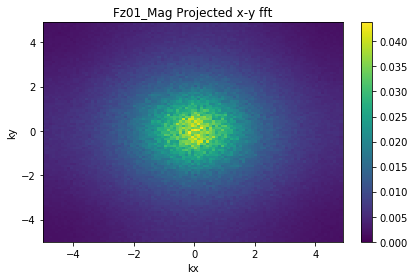

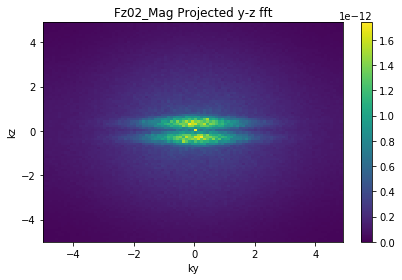

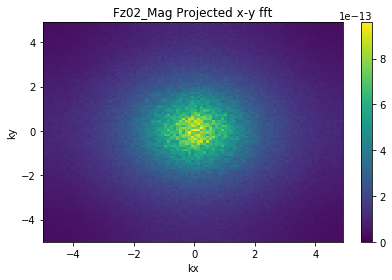

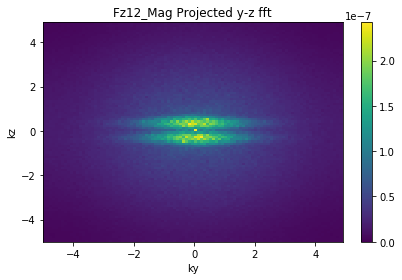

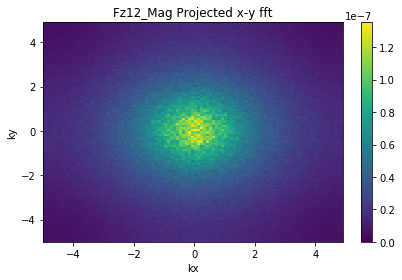

In [71]:
fields = ['FzOffDiag_Mag','Fz01_Mag','Fz02_Mag','Fz12_Mag']
anti_fields = ['FxOffDiag_Magbar','Fx01_Magbar','Fx02_Magbar','Fx12_Magbar']

for field in fields:
    #make sure to specify which filename
    f = FFT(filename3flavor,field)
    
    # Plot the Fourier surface.
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    #surf = ax.plot_surface(Ky, Kz, dMeu_k, cmap=cm.coolwarm,linewidth=0, antialiased=True)
    #ax.set_xlabel("ky")
    #ax.set_ylabel("kz")
    #ax.set_zlabel("Meu_k")

    #plt.tight_layout()

#regular fft slice plots
    #fig, ax = plt.subplots()
    #ax.pcolor(f[1], f[2], f[3][50,:,:].T, vmin=0.,vmax=np.max(f[4]))
    #ax.set_xlabel("ky")
    #ax.set_ylabel("kz")
    #plt.title(str(field) + " y-z fft")
    #plt.tight_layout()

    #fig, ax = plt.subplots()
    #ax.pcolor(f[0], f[1], f[3][:,:,50].T, vmin=0.,vmax=np.max(f[4]))
    #ax.set_xlabel("kx")
    #ax.set_ylabel("ky")
    #plt.title(str(field) + " x-y fft")
    #plt.tight_layout()

#fft projected slice plots
    dMeu_k_projected = np.sum(f[3], axis=0)
    dMeu_k_a_projected = np.sum(f[4], axis=0)
    fig, ax = plt.subplots()
    c = ax.pcolor(f[1], f[2], dMeu_k_projected.T, vmin=0.,vmax=np.max(dMeu_k_a_projected))
    ax.set_xlabel("ky")
    ax.set_ylabel("kz")
    fig.colorbar(c, ax=ax)
    plt.title(str(field) + " Projected y-z fft")
    plt.tight_layout()
    plt.savefig("/global/homes/n/nmford20/Emu3d/{0}_{1}.png".format(ds, field))

    dMeu_k_projected = np.sum(f[3], axis=2)
    dMeu_k_a_projected = np.sum(f[4], axis=2)
    fig, ax = plt.subplots()
    c = ax.pcolor(f[0], f[1], dMeu_k_projected.T, vmin=0.,vmax=np.max(dMeu_k_a_projected))
    ax.set_xlabel("kx")
    ax.set_ylabel("ky")
    fig.colorbar(c, ax=ax)
    plt.title(str(field) + " Projected x-y fft")
    plt.tight_layout()
    plt.savefig("/global/homes/n/nmford20/Emu3d/{0}_{1}.png".format(ds, field))

# Power Spectrum Analysis

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import os

"""
Make a turbulent power spectrum. 

Ultimately, we aim to compute:

                      ^      ^*
     E(k) = integral  V(k) . V(k) dS
                      

                              ^
where V = U is the field, and V is the
FFT of V.

(Note: sometimes we normalize by 1/volume to get a spectral
energy density spectrum).


"""


def doit(ds,field):
    
    # a FFT operates on uniformly gridded data.  We'll use the yt
    # covering grid for this.

    max_level = ds.index.max_level

    ref = int(np.product(ds.ref_factors[0:max_level]))

    low = ds.domain_left_edge
    dims = ds.domain_dimensions*ref

    nx, ny, nz = dims

    Kk = np.zeros( (nx//2+1, ny//2+1, nz//2+1))

    Kk += fft_comp(ds, field, max_level, low, dims)

    # wavenumbers
    L = (ds.domain_right_edge - ds.domain_left_edge).d

    kx = np.fft.rfftfreq(nx)*nx/L[0]
    ky = np.fft.rfftfreq(ny)*ny/L[1]
    kz = np.fft.rfftfreq(nz)*nz/L[2]

    # physical limits to the wavenumbers - try multiplying by 2pi for the paper
    kmin = np.min(1.0/L)
    kmax = np.min(0.5*dims/L)

    kbins = np.arange(kmin, kmax, kmin)
    N = len(kbins)

    # bin the Fourier amplitude or phase into radial kbins
    #if indexing is set to xy instead of ij, you need to take the transpose
    kx3d, ky3d, kz3d = np.meshgrid(kx, ky, kz, indexing="ij")
    k = np.sqrt(kx3d**2 + ky3d**2 + kz3d**2)

    #outputs indices for k values in set of bins
    whichbin = np.digitize(k.flat, kbins)
    #how many things are in each bin
    ncount = np.bincount(whichbin)

    E_spectrum = np.zeros(len(ncount)-1)

    #summing the flattened fourier transforms inside each bin
    for n in range(1,len(ncount)):
        E_spectrum[n-1] = np.sum(Kk.flat[whichbin==n])

    k = 0.5*(kbins[0:N-1] + kbins[1:N])
    E_spectrum = E_spectrum[1:N]

    index = np.argmax(E_spectrum)
    kmax = k[index]
    Emax = E_spectrum[index]

    return [E_spectrum,k,kmax,Emax]


def fft_comp(ds, iu, level, low, delta ):

    cube = ds.covering_grid(level, left_edge=low,
                            dims=delta,
                            fields=[iu])

    #u is whichever field
    u = cube[iu].d

    nx, ny, nz = u.shape

    # do the FFTs -- note that since our data is real, there will be
    # too much information here.  fftn puts the positive freq terms in
    # the first half of the axes -- that's what we keep.  Our
    # normalization has an '8' to account for this clipping to one
    # octant.
    ru = np.fft.fftn(u)[0:nx//2+1,0:ny//2+1,0:nz//2+1]
    #taking FFT for real data, complex conjugate of FFT for + freqs is same as for - freqs
    #the - freqs have same distribution as + freqs, so we don't directly need them but we want to include their power
    #normalizing by number of points used to take FFT
    ru = 8.0*ru/(nx*ny*nz)

    #want the square of the abs of the FFT
    return np.abs(ru)**2


# Power Spectrum Analysis for 3D Simulation

yt : [INFO     ] 2020-12-10 17:30:45,056 Parameters: current_time              = 1.7696124760064265e-10
yt : [INFO     ] 2020-12-10 17:30:45,057 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-12-10 17:30:45,057 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-10 17:30:45,058 Parameters: domain_right_edge         = [64. 64. 64.]
yt : [INFO     ] 2020-12-10 17:31:13,991 Parameters: current_time              = 2.6544227371226975e-10
yt : [INFO     ] 2020-12-10 17:31:13,992 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-12-10 17:31:13,993 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-10 17:31:13,994 Parameters: domain_right_edge         = [64. 64. 64.]
yt : [INFO     ] 2020-12-10 17:31:39,549 Parameters: current_time              = 3.585401178930252e-10
yt : [INFO     ] 2020-12-10 17:31:39,550 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-12-10 17

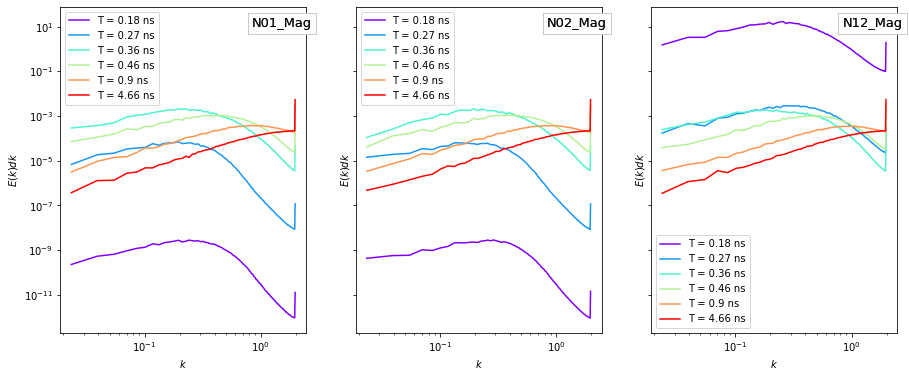

In [58]:
ts = yt.load(["/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt00200","/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt00300","/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt00400","/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt00500","/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt00900","/global/cscratch1/sd/srichers/3D_3flavor_5ns_v2/plt03900"])
fields = ['N01_Mag','N02_Mag','N12_Mag']
color=iter(cm.rainbow(np.linspace(0,1,len(ts))))

#define the figure and subplot sizing here
# Set up a 3x3 figure 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6), sharex=True, sharey=True)

#for each field, loop through each of the chosen timesteps
for ds in ts:
    #loop through each field
    c=next(color)
    for i in range(0,3):
        #call whichever axes you're on here
        ax = axes[i]
        #axes.plot, will do this n times, n = len(filenames) and then plots should be overlaid on a given ax
        E_spectrum,k,kmax,Emax = doit(ds,fields[i])
        #using ax here to work with subplots
        ax.loglog(k, E_spectrum, c=c, label = "T = {} ns".format(round(float(ds.current_time.in_units("ns")),2)))
        #plots a line that corresponds to kolmogorov scaling in log space
        #ax.loglog(k, Emax*(k/kmax)**(-5./3.), ls=":", color="0.5",label = "kolmogorov")
        ax.annotate("{}".format(fields[i]), (0.9, 0.95), xycoords='axes fraction', fontsize=13, ha="center", va="center",bbox=dict(facecolor='white', alpha=0.5, edgecolor='.75'))
        ax.legend()
        ax.set_xlabel(r"$k$")
        ax.set_ylabel(r"$E(k)dk$")
#make sure it grabs correct filename
plt.savefig("spectrum_offdiag.png",dpi=300, bbox_inches="tight")